# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:
Base on latitude data of analysis at time April 11, 2020:
-	 The north of equator has more cities than south of equator and the weather in the north is seems to be warmer than south of the equator.
-	The most common observations are (i) still many cities below 32 degree of Fahrenheit at this time of the year in North of equator and none of cities are below 32 degree of Fahrenheit in south of equator; (ii) Wind Speed between 0-15 mph a long latitude points and very few higher wind speed above 25 mph; (iii) difficult to comparison between latitude vs Humidity. 
-	In correlation analysis, there are not significant correlation was found between latitude vs Northern/Southern (Humidity, Cloudiness, Wind Speed); except Latitude vs Southern Hemisphere – Max Temp. However, using the average (mean) may provide more insight to the information. 
-	We may observe the weather with the wind speed and the cloudiness of those cities along the costal vs in-land by latitude vs longitude plotting.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city=city

# Build query URL to see the data structure and comparing data sturcture on website under JSON
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': 24.73, 'lat': -34},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 289.17,
  'feels_like': 285.8,
  'temp_min': 289.17,
  'temp_max': 289.17,
  'pressure': 1006,
  'humidity': 54,
  'sea_level': 1006,
  'grnd_level': 978},
 'wind': {'speed': 3.72, 'deg': 293},
 'clouds': {'all': 100},
 'dt': 1586661100,
 'sys': {'country': 'ZA', 'sunrise': 1586666492, 'sunset': 1586707295},
 'timezone': 7200,
 'id': 986717,
 'name': 'Kruisfontein',
 'cod': 200}

In [4]:
# url from openweathermap.org and 
# add 'units=Imperial&' to convert Kelvin(K) to Fahrenheit(°F) temperature
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Define empty lists to held values
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
city_name = []
date = []

#Looping through cities to make api calls using city as query

print('Start of Records')
print('------------------------------')

i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data and handled missing information via try and except method
    try:
        temp.append(response["main"]['temp'])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        date.append(response["dt"])
    
        print(f"Processing record {i}|{city}")
        i+=1
   
    except (KeyError):
        print("City not found. skipping.")

print('------------------------------')
print('End of Records')


Start of Records
------------------------------
Processing record 1|saint-philippe
Processing record 2|paraiso
Processing record 3|punta arenas
Processing record 4|helong
Processing record 5|ushuaia
Processing record 6|half moon bay
City not found. skipping.
Processing record 7|cape town
Processing record 8|bijie
Processing record 9|cedar city
Processing record 10|pevek
Processing record 11|san quintin
Processing record 12|namwala
Processing record 13|yaan
Processing record 14|kapaa
Processing record 15|albany
Processing record 16|dali
Processing record 17|palana
Processing record 18|busselton
Processing record 19|avarua
Processing record 20|la carolina
Processing record 21|yumen
Processing record 22|amahai
Processing record 23|arraial do cabo
Processing record 24|burns lake
Processing record 25|rikitea
Processing record 26|hovd
Processing record 27|mataura
Processing record 28|port elizabeth
Processing record 29|yellowknife
City not found. skipping.
Processing record 30|ciudad bolivar

Processing record 245|caravelas
Processing record 246|marsa matruh
Processing record 247|mocuba
Processing record 248|tete
Processing record 249|lompoc
Processing record 250|esna
Processing record 251|umm lajj
Processing record 252|faanui
Processing record 253|lishui
Processing record 254|briancon
City not found. skipping.
Processing record 255|merrill
Processing record 256|ngunguru
Processing record 257|buinsk
Processing record 258|marquette
Processing record 259|jarva-jaani
City not found. skipping.
Processing record 260|sao filipe
Processing record 261|gornyy
Processing record 262|quatre cocos
City not found. skipping.
Processing record 263|chegdomyn
Processing record 264|winnemucca
Processing record 265|ayan
Processing record 266|obidos
City not found. skipping.
Processing record 267|broome
Processing record 268|lypcha
Processing record 269|rocky mountain house
Processing record 270|hofn
Processing record 271|gerzat
Processing record 272|novovasylivka
City not found. skipping.
Proc

Processing record 482|murdochville
Processing record 483|vilani
Processing record 484|lithakia
Processing record 485|korla
Processing record 486|mbanza-ngungu
Processing record 487|coihaique
Processing record 488|penzance
Processing record 489|abu samrah
Processing record 490|johnstown
Processing record 491|kerrobert
Processing record 492|cairns
Processing record 493|moshi
Processing record 494|zyryanovsk
Processing record 495|gediz
Processing record 496|ilhabela
Processing record 497|yumbel
Processing record 498|shenjiamen
Processing record 499|koungheul
Processing record 500|ambilobe
Processing record 501|imbituba
Processing record 502|trapani
City not found. skipping.
City not found. skipping.
Processing record 503|henties bay
Processing record 504|markapur
Processing record 505|moree
Processing record 506|bose
Processing record 507|saint-joseph
Processing record 508|bulgan
Processing record 509|tateyama
Processing record 510|manzil salim
Processing record 511|coxim
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Data Frame to hold data
city_data_df = pd.DataFrame({'Country': country,
                            'City':city_name,
                             'Temperature': temp,
                            'Max Temperature': max_temp,
                             'Humidity': humidity,
                             'Cloud': cloudiness,
                             'Wind Speed': wind_speed,
                             'Latitude': lat,
                             'Longtitude': lng,
                            })
city_data_df.head()        

,Country,City,Temperature,Max Temperature,Humidity,Cloud,Wind Speed,Latitude,Longtitude
0,RE,Saint-Philippe,67.59,73.40,73,22,6.93,-21.36,55.77
1,CR,Paraíso,75.20,75.20,78,97,6.93,9.84,-83.87
2,CL,Punta Arenas,42.39,42.80,87,75,11.41,-53.15,-70.92
3,CN,Helong,46.74,46.74,41,0,6.62,42.54,129.00
4,AR,Ushuaia,39.20,39.20,80,40,5.82,-54.80,-68.30


In [6]:
# Export city_data_df.to_csv as city.csv
city_data_df.to_csv("../output_data/city.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(-70, 90)

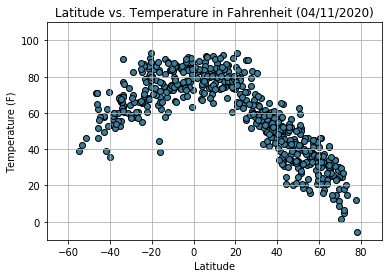

In [7]:
# set timestamp for report as required
today = time.strftime("%m/%d/%Y")

# Use dataframe City_data_df to plot the graph
plt.scatter(city_data_df['Latitude'],city_data_df['Temperature'], marker='o', facecolors='#367d9e', edgecolors='black')

# Create a title, x label, and y label for our chart
plt.title(f'Latitude vs. Temperature in Fahrenheit ({today})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig("../Images/fig1.png", dpi=300)

# Set the upper and lower limits of y axis and x axis
plt.ylim(-10,110)
plt.xlim(-70,90)

#### Latitude vs. Humidity Plot

(-70, 90)

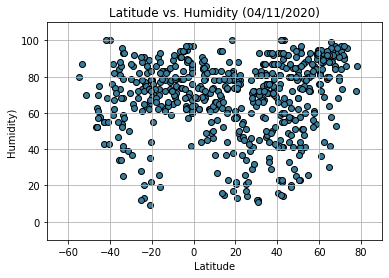

In [8]:
# set timestamp for report as required
today = time.strftime("%m/%d/%Y")

# Use dataframe City_data_df to plot the graph
plt.scatter(city_data_df['Latitude'],city_data_df['Humidity'], marker='o', facecolors='#367d9e', edgecolors='black')

# Create a title, x label, and y label for our chart
plt.title(f'Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.grid(True)
plt.savefig("../Images/fig2.png", dpi=300)

# Set the upper and lower limits of y axis and x axis
plt.ylim(-10,110)
plt.xlim(-70,90)

#### Latitude vs. Cloudiness Plot

(-70, 90)

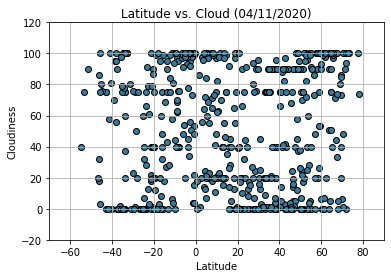

In [9]:
# set timestamp for report as required
today = time.strftime("%m/%d/%Y")

# Use dataframe City_data_df to plot the graph
plt.scatter(city_data_df['Latitude'],city_data_df['Cloud'], marker='o', facecolors='#367d9e', edgecolors='black')

# Create a title, x label, and y label for our chart
plt.title(f'Latitude vs. Cloud ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig("../Images/fig3.png", dpi=300)

# Set the upper and lower limits of y axis and x axis
plt.ylim(-20,120)
plt.xlim(-70,90)

#### Latitude vs. Wind Speed Plot

(-70, 90)

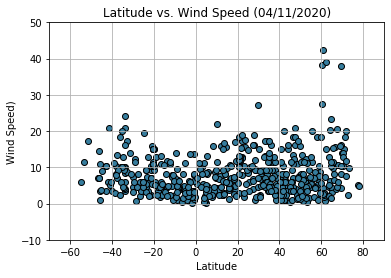

In [10]:
# set timestamp for report as required
today = time.strftime("%m/%d/%Y")

# Use dataframe City_data_df to plot the graph
plt.scatter(city_data_df['Latitude'],city_data_df['Wind Speed'], marker='o', facecolors='#367d9e', edgecolors='black')

# Create a title, x label, and y label for our chart
plt.title(f'Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed)')
plt.grid(True)
plt.savefig("../Images/fig4.png", dpi=300)

# Set the upper and lower limits of y axis and x axis
plt.ylim(-10,50)
plt.xlim(-70,90)

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude).
northern_hemisphere = city_data_df.loc[city_data_df["Latitude"]>=0]
southern_hemisphere = city_data_df.loc[city_data_df["Latitude"]<0]
# print(northern_hemisphere)
# print(southern_hemisphere)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.910263312300668


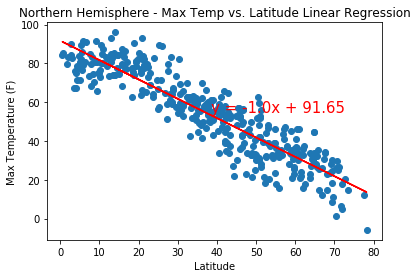

None


In [13]:
# use dataframe northern_hemisphere to get x_values and y_values
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temperature']

# Set the title and label for y axis and x axis
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Images/fig5.png", dpi=300)
print(linear_reg_plot(x_values,y_values),)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6282426358097575


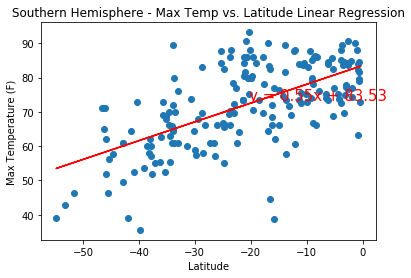

None


In [14]:
# use dataframe southern_hemisphere to get x_values and y_values
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temperature']

# Set the title and label for y axis and x axis
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Images/fig6.png", dpi=300)
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24882559399627463


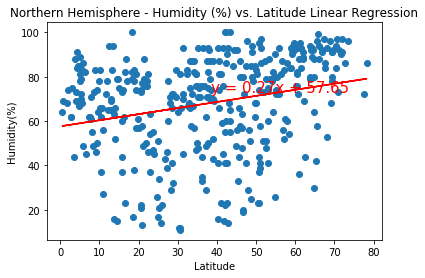

None


In [15]:
# use dataframe northern_hemisphere to get x_values and y_values
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']

# Set the title and label for y axis and x axis
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity(%)')
plt.savefig("../Images/fig7.png", dpi=300)
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24117365598359794


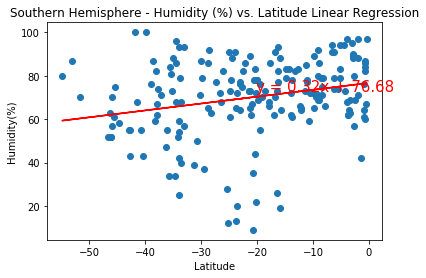

None


In [16]:
# use dataframe southern_hemisphere to get x_values and y_values
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']

# Set the title and label for y axis and x axis
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity(%)')
plt.savefig("../Images/fig8.png", dpi=300)
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15722097104041854


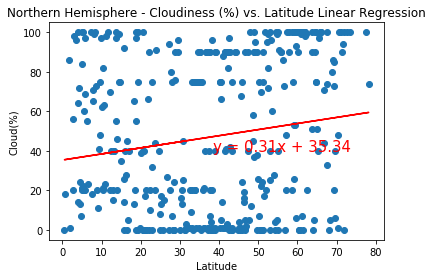

None


In [17]:
# use dataframe northern_hemisphere to get x_values and y_values
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloud']

# Set the title and label for y axis and x axis
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('Cloud(%)')
plt.savefig("../Images/fig9.png", dpi=300)
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17690709693174525


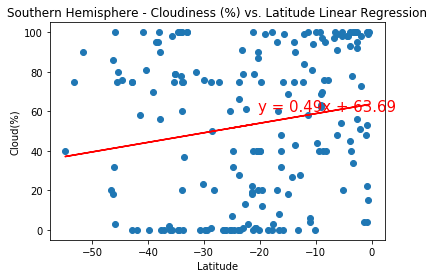

None


In [18]:
# use dataframe southern_hemisphere to get x_values and y_values
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloud']

# Set the title and label for y axis and x axis
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('Cloud(%)')
plt.savefig("../Images/fig10.png", dpi=300)
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14646962609270256


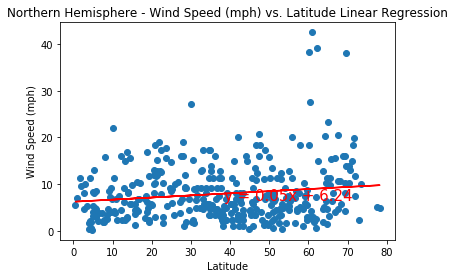

None


In [19]:
# use dataframe northern_hemisphere to get x_values and y_values
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']

# Set the title and label for y axis and x axis
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/fig11.png", dpi=300)
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3635168230817477


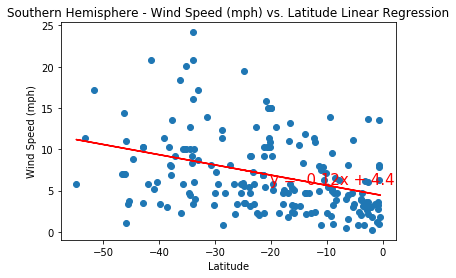

None


In [20]:
# use dataframe southern_hemisphere to get x_values and y_values
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']

# Set the title and label for y axis and x axis
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/fig12.png", dpi=300)
print(linear_reg_plot(x_values,y_values))